In [1]:
import numpy as np
import sdeint
import random
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import networkx as nx
import sys
sys.path.append("/home/simone/Scrivania/Tesi/wealth_condensation-main/python/")
import wealth_condensation as wc
from scipy.optimize import curve_fit

In [2]:
N=1000
m=0.5
s=1
mu=0.1
sigma=1
phi=0.
f=0.
sigmat=0.
J0=0.5
t_tot=30
dt=.01
sim=20
sim2=30
sim3=25
sim4=15
n_cores=[175,150,125,100,75,50,25]
n_step=int(t_tot/dt)
df1=pd.DataFrame(columns=["sim","N_core","Wealth_Share"])
n_step_true=int(n_step/3)


In [3]:
for i in range(sim):
    for n_core in n_cores:
    
        n_branch=N-n_core
        G=wc.sun_graph_rand(n_core,n_branch)
        A0=nx.to_numpy_array(G)
        c=np.sum(A0,axis=0)
    #c=4*np.ones(N)
    
        A,B=wc.simulate.interaction_matrix_sun(N,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)
    ## initial conditions
        x=np.ones(N+1)
        result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)
        result=result[int(2*n_step/3):,:]
        result=result[:,:N]
   
        tot_wealth=result.sum(axis=1)
        wealth_share=result/tot_wealth.reshape(-1,1)
    
    
        df0 = pd.DataFrame({"sim":[sim],"N_core":[n_core],"Wealth_Share": [wealth_share]})
        df1=pd.concat([df1,df0])


In [4]:
df1.to_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth.p.gz")

In [3]:
dw=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth.p.gz")

In [4]:
dranks=pd.DataFrame(columns=["node_list","ranks","decile"])

In [5]:
for j in range(140):
    node_list=np.arange(N)
    k=np.argsort(dw.iat[j,2][0,:])
    w=dw.iat[j,2][:,k]
    node_list=node_list[k]
    
    ranks=np.argsort(w, axis=1)
    ranks_q=np.int32(10*ranks/N)
    
    dranks0 = pd.DataFrame({"node_list":[node_list],"ranks": [ranks],"decile":[ranks_q]})
    dranks = pd.concat([dranks,dranks0])

In [6]:
dpers=pd.DataFrame(columns=["top","mid","bot","shorrocks"])

In [7]:
for j in range(140):
    p_top=wc.analyze.persistence_top_series(dranks.iat[j,1],N,10,n_step_true)
    p_bot=wc.analyze.persistence_bottom_series(dranks.iat[j,1],N,10,n_step_true)
    p_mid=wc.analyze.persistence_5060_series(dranks.iat[j,1],N,10,n_step_true)
    sho=s_index=wc.analyze.shorrocks_series(dranks.iat[j,1],N,10,n_step_true)
    
    dpers0 = pd.DataFrame({"top":[p_top],"mid":[p_mid],"bot": [p_bot],"shorrocks":[sho]})
    dpers = pd.concat([dpers,dpers0])

In [8]:
dpers.to_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence1.p.gz") 

In [9]:
dpers=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence1.p.gz")

In [10]:
tops=[]
mids=[]
bots=[]
shos=[]

In [11]:
for j in range(len(n_cores)):
    top=dpers.iat[j,0]
    mid=dpers.iat[j,1]
    bot=dpers.iat[j,2]
    sho=dpers.iat[j,3]
    i=7
    while i<140:
        top=top+dpers.iat[i+j,0]
        mid=mid+dpers.iat[i+j,1]
        bot=bot+dpers.iat[i+j,2]
        sho=sho+dpers.iat[i+j,3]
        i=i+7
        
    top=top/sim
    bot=bot/sim
    mid=mid/sim
    sho=sho/sim
   
    tops.append(top)
    bots.append(bot)
    mids.append(mid)
    shos.append(sho)

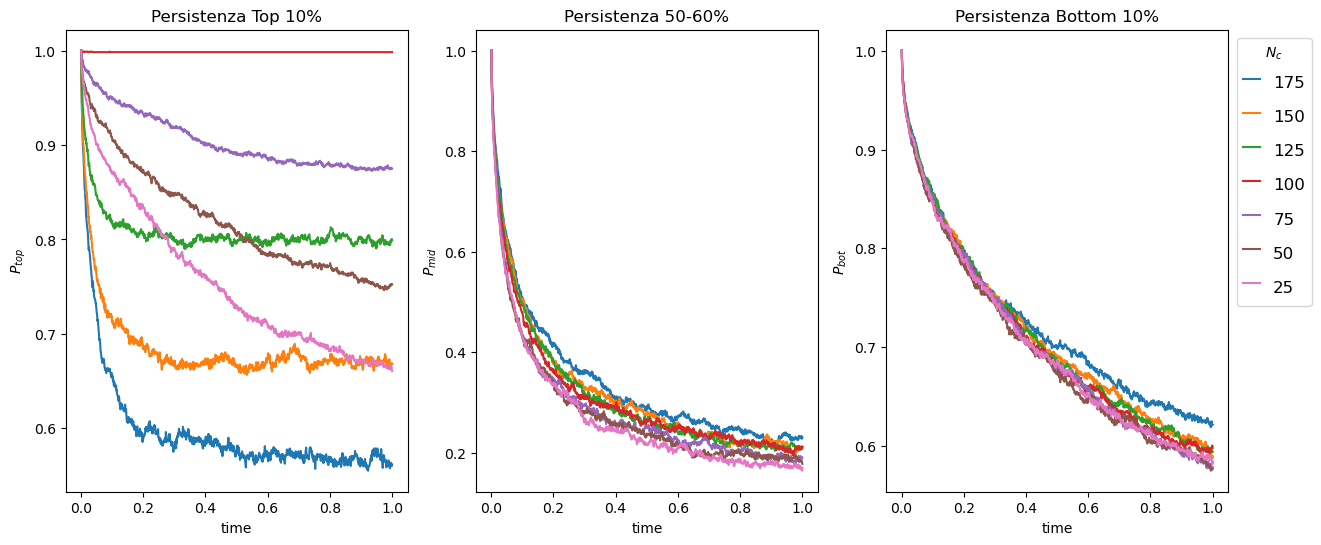

In [12]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000

fig, axs = plt.subplots(1,3) 

for i in range(7):
    
   
    
    
    axs[0].plot(t, tops[i])
    axs[0].set_title('Persistenza Top 10%')
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
        
    axs[1].plot(t, mids[i])
    axs[1].set_title('Persistenza 50-60%')
    axs[1].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
        
    axs[2].plot(t, bots[i],label=str(n_cores[i]))
    axs[2].set_title('Persistenza Bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$N_c$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
   
    
    
fig.set_size_inches(15,6) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Core/1000.png",bbox_inches="tight")

In [17]:
N=500
n_cores2=[88,75,63,50,38,25,13]
df2=pd.DataFrame(columns=["sim","N_core","Wealth_Share"])

In [18]:
for i in range(sim2):
    for n_core in n_cores2:
    
        n_branch=N-n_core
        G=wc.sun_graph_rand(n_core,n_branch)
        A0=nx.to_numpy_array(G)
        c=np.sum(A0,axis=0)
    #c=4*np.ones(N)
    
        A,B=wc.simulate.interaction_matrix_sun(N,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)
    ## initial conditions
        x=np.ones(N+1)
        result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)
        result=result[int(2*n_step/3):,:]
        result=result[:,:N]
   
        tot_wealth=result.sum(axis=1)
        wealth_share=result/tot_wealth.reshape(-1,1)
    
    
        df02 = pd.DataFrame({"sim":[sim],"N_core":[n_core],"Wealth_Share": [wealth_share]})
        df2=pd.concat([df2,df02])


In [19]:
df2.to_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth2.p.gz")

In [20]:
dw2=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth2.p.gz")

In [21]:
dranks2=pd.DataFrame(columns=["node_list","ranks","decile"])

In [22]:
for j in range(210):
    node_list=np.arange(N)
    k=np.argsort(dw2.iat[j,2][0,:])
    w=dw2.iat[j,2][:,k]
    node_list=node_list[k]
    
    ranks=np.argsort(w, axis=1)
    ranks_q=np.int32(10*ranks/N)
    
    dranks02 = pd.DataFrame({"node_list":[node_list],"ranks": [ranks],"decile":[ranks_q]})
    dranks2 = pd.concat([dranks2,dranks02])

In [23]:
dpers2=pd.DataFrame(columns=["top","mid","bot","shorrocks"])

In [24]:
for j in range(210):
    p_top=wc.analyze.persistence_top_series(dranks2.iat[j,1],N,10,n_step_true)
    p_bot=wc.analyze.persistence_bottom_series(dranks2.iat[j,1],N,10,n_step_true)
    p_mid=wc.analyze.persistence_5060_series(dranks2.iat[j,1],N,10,n_step_true)
    sho=s_index=wc.analyze.shorrocks_series(dranks2.iat[j,1],N,10,n_step_true)
    
    dpers0 = pd.DataFrame({"top":[p_top],"mid":[p_mid],"bot": [p_bot],"shorrocks":[sho]})
    dpers2 = pd.concat([dpers2,dpers0])

In [25]:
dpers2.to_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence2.p.gz") 

In [26]:
dpers2=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence2.p.gz")

In [27]:
tops2=[]
mids2=[]
bots2=[]
shos2=[]

In [28]:
for j in range(len(n_cores2)):
    top=dpers2.iat[j,0]
    mid=dpers2.iat[j,1]
    bot=dpers2.iat[j,2]
    sho=dpers2.iat[j,3]
    i=7
    while i<210:
        top=top+dpers2.iat[i+j,0]
        mid=mid+dpers2.iat[i+j,1]
        bot=bot+dpers2.iat[i+j,2]
        sho=sho+dpers2.iat[i+j,3]
        i=i+7
        
    top=top/sim2
    bot=bot/sim2
    mid=mid/sim2
    sho=sho/sim2
   
    tops2.append(top)
    bots2.append(bot)
    mids2.append(mid)
    shos2.append(sho)

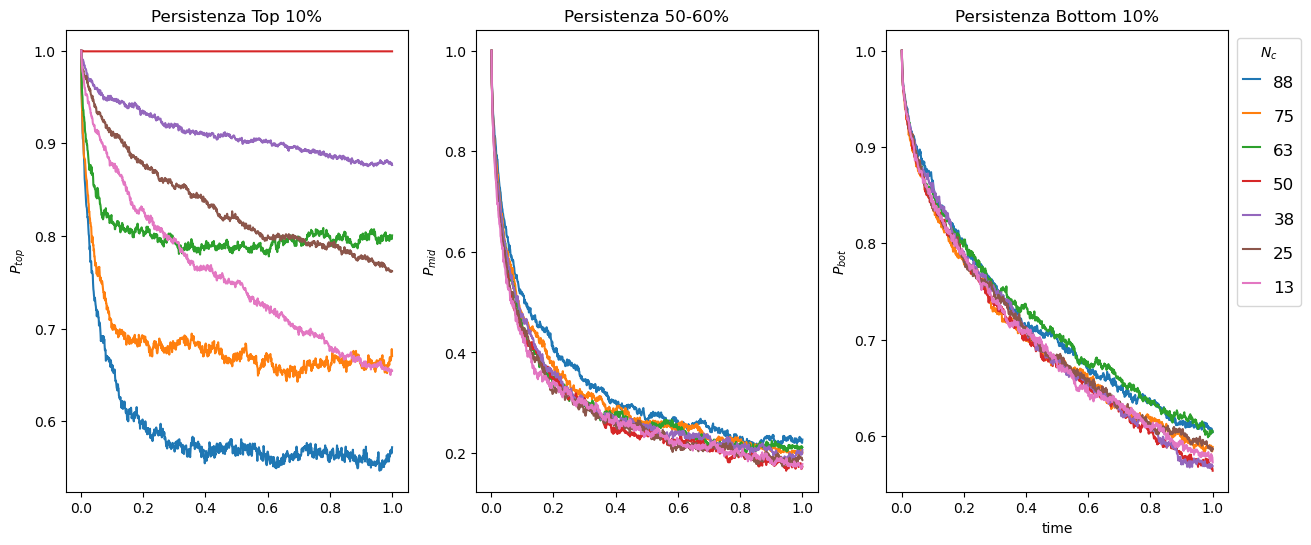

In [29]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000

fig, axs = plt.subplots(1,3) 

for i in range(7):
    
   
    
    
    axs[0].plot(t, tops2[i])
    axs[0].set_title('Persistenza Top 10%')
    #axs[0,0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
        
    axs[1].plot(t, mids2[i])
    axs[1].set_title('Persistenza 50-60%')
    #axs[1,0].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
        
    axs[2].plot(t, bots2[i],label=str(n_cores2[i]))
    axs[2].set_title('Persistenza Bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$N_c$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
   
    
    
fig.set_size_inches(15,6) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Core/500.png",bbox_inches="tight")

In [3]:
N=750
n_cores3=[131,113,94,75,56,38,19]
df3=pd.DataFrame(columns=["sim","N_core","Wealth_Share"])

In [4]:
for i in range(sim3):
    for n_core in n_cores3:
    
        n_branch=N-n_core
        G=wc.sun_graph_rand(n_core,n_branch)
        A0=nx.to_numpy_array(G)
        c=np.sum(A0,axis=0)
    #c=4*np.ones(N)
    
        A,B=wc.simulate.interaction_matrix_sun(N,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)
    ## initial conditions
        x=np.ones(N+1)
        result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)
        result=result[int(2*n_step/3):,:]
        result=result[:,:N]
   
        tot_wealth=result.sum(axis=1)
        wealth_share=result/tot_wealth.reshape(-1,1)
    
    
        df03= pd.DataFrame({"sim":[sim],"N_core":[n_core],"Wealth_Share": [wealth_share]})
        df3=pd.concat([df3,df03])


In [5]:
df3.to_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth5.p.gz")

In [6]:
dw3=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth5.p.gz")

In [9]:
dranks3=pd.DataFrame(columns=["node_list","ranks","decile"])

In [10]:
for j in range(175):
    node_list=np.arange(N)
    k=np.argsort(dw3.iat[j,2][0,:])
    w=dw3.iat[j,2][:,k]
    node_list=node_list[k]
    
    ranks=np.argsort(w, axis=1)
    ranks_q=np.int32(10*ranks/N)
    
    dranks03 = pd.DataFrame({"node_list":[node_list],"ranks": [ranks],"decile":[ranks_q]})
    dranks3 = pd.concat([dranks3,dranks03])

In [11]:
dpers3=pd.DataFrame(columns=["top","mid","bot","shorrocks"])

In [12]:
for j in range(175):
    p_top=wc.analyze.persistence_top_series(dranks3.iat[j,1],N,10,n_step_true)
    p_bot=wc.analyze.persistence_bottom_series(dranks3.iat[j,1],N,10,n_step_true)
    p_mid=wc.analyze.persistence_5060_series(dranks3.iat[j,1],N,10,n_step_true)
    sho=s_index=wc.analyze.shorrocks_series(dranks3.iat[j,1],N,10,n_step_true)
    
    dpers0 = pd.DataFrame({"top":[p_top],"mid":[p_mid],"bot": [p_bot],"shorrocks":[sho]})
    dpers3 = pd.concat([dpers3,dpers0])

In [13]:
dpers3.to_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence5.p.gz") 

In [14]:
dpers3=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence5.p.gz")

In [15]:
tops3=[]
mids3=[]
bots3=[]
shos3=[]

In [17]:
for j in range(len(n_cores3)):
    top=dpers3.iat[j,0]
    mid=dpers3.iat[j,1]
    bot=dpers3.iat[j,2]
    sho=dpers3.iat[j,3]
    i=7
    while i<175:
        top=top+dpers3.iat[i+j,0]
        mid=mid+dpers3.iat[i+j,1]
        bot=bot+dpers3.iat[i+j,2]
        sho=sho+dpers3.iat[i+j,3]
        i=i+7
        
    top=top/sim3
    bot=bot/sim3
    mid=mid/sim3
    sho=sho/sim3
   
    tops3.append(top)
    bots3.append(bot)
    mids3.append(mid)
    shos3.append(sho)

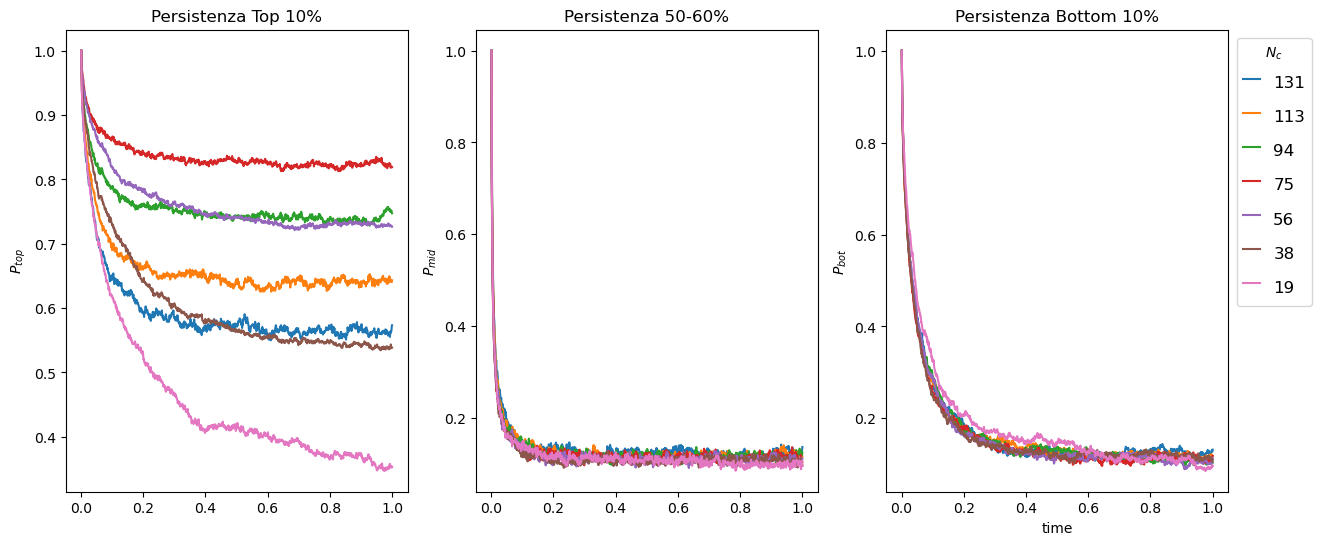

In [18]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000

fig, axs = plt.subplots(1,3) 

for i in range(7):
    
   
    
    
    axs[0].plot(t, tops3[i])
    axs[0].set_title('Persistenza Top 10%')
    #axs[0,0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
        
    axs[1].plot(t, mids3[i])
    axs[1].set_title('Persistenza 50-60%')
    #axs[1,0].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
        
    axs[2].plot(t, bots3[i],label=str(n_cores3[i]))
    axs[2].set_title('Persistenza Bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$N_c$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
   
    
    
fig.set_size_inches(15,6) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Core/750.png",bbox_inches="tight")

In [16]:
N=1250
n_cores4=[219,188,156,125,94,63,31]
df4=pd.DataFrame(columns=["sim","N_core","Wealth_Share"])

In [ ]:
for i in range(sim4):
    
    for n_core in n_cores4:
    
        n_branch=N-n_core
        G=wc.sun_graph_rand(n_core,n_branch)
        A0=nx.to_numpy_array(G)
        c=np.sum(A0,axis=0)
    #c=4*np.ones(N)
    
        A,B=wc.simulate.interaction_matrix_sun(n_core,n_branch,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)
    ## initial conditions
        x=np.ones(N+1)
        result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)
        result=result[int(2*n_step/3):,:]
        result=result[:,:N]
   
        tot_wealth=result.sum(axis=1)
        wealth_share=result/tot_wealth.reshape(-1,1)
    
    
        df0 = pd.DataFrame({"sim":[sim],"N_core":[n_core],"Wealth_Share": [wealth_share]})
        df4=pd.concat([df4,df0])


In [ ]:
df4.to_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth4.p.gz")

In [ ]:
dw4=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth4.p.gz")

In [5]:
dranks4=pd.DataFrame(columns=["node_list","ranks","decile"])

In [6]:
for j in range(105):
    node_list=np.arange(N)
    k=np.argsort(dw4.iat[j,2][0,:])
    w=dw4.iat[j,2][:,k]
    node_list=node_list[k]
    
    ranks=np.argsort(w, axis=1)
    ranks_q=np.int32(10*ranks/N)
    
    dranks0 = pd.DataFrame({"node_list":[node_list],"ranks": [ranks],"decile":[ranks_q]})
    dranks4 = pd.concat([dranks4,dranks0])

In [7]:
dpers4=pd.DataFrame(columns=["top","mid","bot","shorrocks"])

In [8]:
for j in range(105):
    p_top=wc.analyze.persistence_top_series(dranks4.iat[j,1],N,10,n_step_true)
    p_bot=wc.analyze.persistence_bottom_series(dranks4.iat[j,1],N,10,n_step_true)
    p_mid=wc.analyze.persistence_5060_series(dranks4.iat[j,1],N,10,n_step_true)
    sho=s_index=wc.analyze.shorrocks_series(dranks4.iat[j,1],N,10,n_step_true)
    
    dpers0 = pd.DataFrame({"top":[p_top],"mid":[p_mid],"bot": [p_bot],"shorrocks":[sho]})
    dpers4 = pd.concat([dpers4,dpers0])

In [9]:
dpers4.to_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence4.p.gz") 

In [10]:
dpers4=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence4.p.gz")

In [11]:
tops4=[]
mids4=[]
bots4=[]
shos4=[]

In [12]:
for j in range(len(n_cores4)):
    top=dpers4.iat[j,0]
    mid=dpers4.iat[j,1]
    bot=dpers4.iat[j,2]
    sho=dpers4.iat[j,3]
    i=7
    while i<105:
        top=top+dpers4.iat[i+j,0]
        mid=mid+dpers4.iat[i+j,1]
        bot=bot+dpers4.iat[i+j,2]
        sho=sho+dpers4.iat[i+j,3]
        i=i+7
        
    top=top/sim4
    bot=bot/sim4
    mid=mid/sim4
    sho=sho/sim4
   
    tops4.append(top)
    bots4.append(bot)
    mids4.append(mid)
    shos4.append(sho)

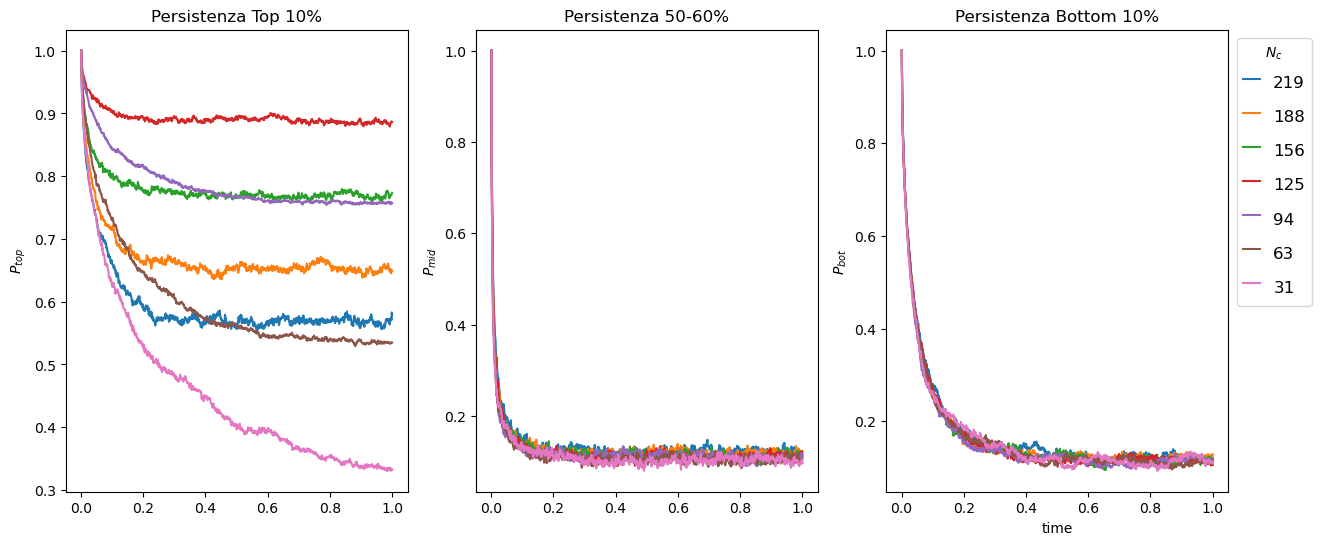

In [13]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000

fig, axs = plt.subplots(1,3) 

for i in range(7):
    
   
    
    
    axs[0].plot(t, tops4[i])
    axs[0].set_title('Persistenza Top 10%')
    #axs[0,0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
        
    axs[1].plot(t, mids4[i])
    axs[1].set_title('Persistenza 50-60%')
    #axs[1,0].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
        
    axs[2].plot(t, bots4[i],label=str(n_cores4[i]))
    axs[2].set_title('Persistenza Bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$N_c$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
   
    
fig.set_size_inches(15,6) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Core/1250.png",bbox_inches="tight")

In [3]:
N=1500
n_cores5=[175+88,150+75,125+63,100+50,75+38,50+25,25+13]
sim5=10
df5=pd.DataFrame(columns=["sim","N_core","Wealth_Share"])

In [4]:
for i in range(sim5):
    for n_core in n_cores5:
    
        n_branch=N-n_core
        G=wc.sun_graph_rand(n_core,n_branch)
        A0=nx.to_numpy_array(G)
        c=np.sum(A0,axis=0)
    #c=4*np.ones(N)
    
        A,B=wc.simulate.interaction_matrix_sun(N,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)
    ## initial conditions
        x=np.ones(N+1)
        result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)
        result=result[int(2*n_step/3):,:]
        result=result[:,:N]
   
        tot_wealth=result.sum(axis=1)
        wealth_share=result/tot_wealth.reshape(-1,1)
    
    
        df05= pd.DataFrame({"sim":[sim],"N_core":[n_core],"Wealth_Share": [wealth_share]})
        df5=pd.concat([df5,df05])


In [5]:
df5.to_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth5.p.gz")

In [6]:
dw5=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/wealth5.p.gz")

In [7]:
dranks5=pd.DataFrame(columns=["node_list","ranks","decile"])

In [9]:
for j in range(70):
    node_list=np.arange(N)
    k=np.argsort(dw5.iat[j,2][0,:])
    w=dw5.iat[j,2][:,k]
    node_list=node_list[k]
    
    ranks=np.argsort(w, axis=1)
    ranks_q=np.int32(10*ranks/N)
    
    dranks0 = pd.DataFrame({"node_list":[node_list],"ranks": [ranks],"decile":[ranks_q]})
    dranks5 = pd.concat([dranks5,dranks0])

In [10]:
dpers5=pd.DataFrame(columns=["top","mid","bot","shorrocks"])

In [11]:
for j in range(105):
    p_top=wc.analyze.persistence_top_series(dranks5.iat[j,1],N,10,n_step_true)
    p_bot=wc.analyze.persistence_bottom_series(dranks5.iat[j,1],N,10,n_step_true)
    p_mid=wc.analyze.persistence_5060_series(dranks5.iat[j,1],N,10,n_step_true)
    sho=s_index=wc.analyze.shorrocks_series(dranks5.iat[j,1],N,10,n_step_true)
    
    dpers0 = pd.DataFrame({"top":[p_top],"mid":[p_mid],"bot": [p_bot],"shorrocks":[sho]})
    dpers5 = pd.concat([dpers5,dpers0])

In [12]:
dpers5.to_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence5.p.gz") 

In [13]:
dpers5=pd.read_pickle("/home/simone/Scrivania/Tesi/data/Core/persistence5.p.gz")

In [14]:
tops5=[]
mids5=[]
bots5=[]
shos5=[]

In [15]:
for j in range(len(n_cores5)):
    top=dpers5.iat[j,0]
    mid=dpers5.iat[j,1]
    bot=dpers5.iat[j,2]
    sho=dpers5.iat[j,3]
    i=7
    while i<70:
        top=top+dpers5.iat[i+j,0]
        mid=mid+dpers5.iat[i+j,1]
        bot=bot+dpers5.iat[i+j,2]
        sho=sho+dpers5.iat[i+j,3]
        i=i+7
        
    top=top/sim5
    bot=bot/sim5
    mid=mid/sim5
    sho=sho/sim5
   
    tops5.append(top)
    bots5.append(bot)
    mids5.append(mid)
    shos5.append(sho)

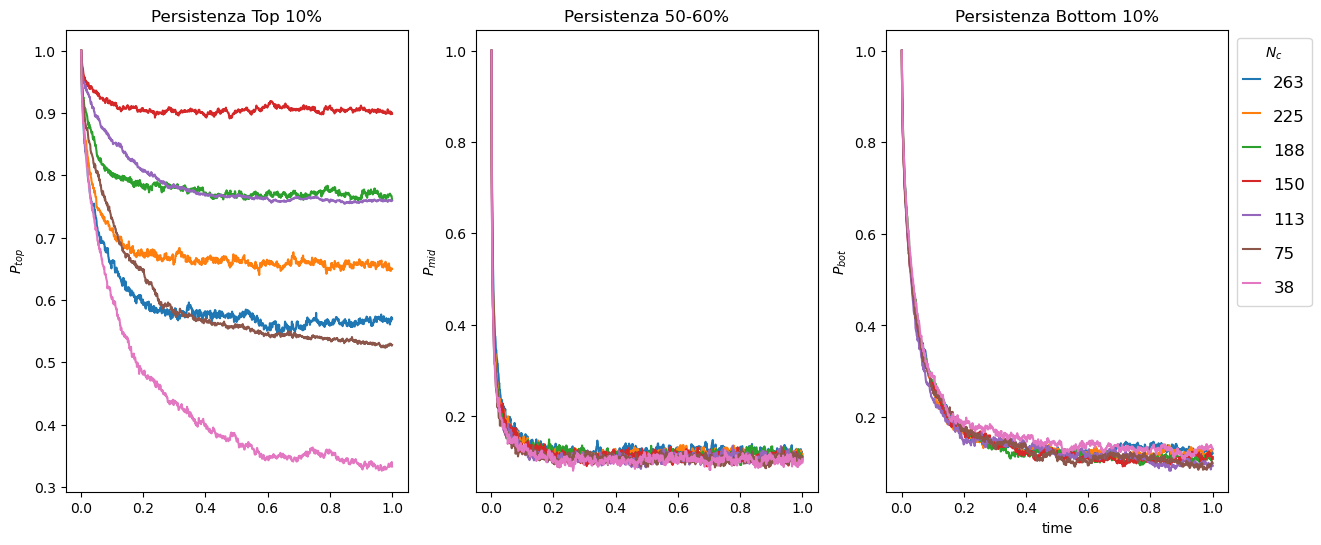

In [16]:
t=np.zeros(n_step_true)

for i in range (n_step_true):
    t[i]=(i+1)/1000

fig, axs = plt.subplots(1,3) 

for i in range(7):
    
   
    
    
    axs[0].plot(t, tops5[i])
    axs[0].set_title('Persistenza Top 10%')
    #axs[0,0].set_xlabel('time')
    axs[0].set_ylabel('$P_{top}$')
        
    axs[1].plot(t, mids5[i])
    axs[1].set_title('Persistenza 50-60%')
    #axs[1,0].set_xlabel('time')
    axs[1].set_ylabel('$P_{mid}$')
        
    axs[2].plot(t, bots5[i],label=str(n_cores5[i]))
    axs[2].set_title('Persistenza Bottom 10%')
    axs[2].set_xlabel('time')
    axs[2].set_ylabel('$P_{bot}$')
    axs[2].legend(title="$N_c$",loc="upper left",bbox_to_anchor=(1, 1), fontsize="large",handlelength=1,handleheight=2)
    
    
   
    
fig.set_size_inches(15,6) 
plt.savefig("/home/simone/Scrivania/Tesi/wealth_condensation-main/Figure/Core/1500.png",bbox_inches="tight")